In [1]:
import os
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm

from src.deep.ml_ops import Trainer

In [4]:
# load trainer from file
# trainer = Trainer.load_trainer_from_file('../../data/saved_models/SingleMuModel3Layers_ds-128_epochs-300_mu-0.008')
trainer = Trainer.load_trainer_from_file('../../data/test_models/SingleMuModel3Layers_ds-120_epochs-3_mu-0.001')

In [5]:
# TODO: create function Trainer.fix_datasets_paths(dataset_path)
trainer.fix_datasets_paths(dataset_path='../../data/datasets')
# trainer.device = 'cpu'

updating path to:
	/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/data/datasets/qam1024_150x5/150_samples_mu=0.001
updating path to:
	/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/data/datasets/qam1024_150x5/150_samples_mu=0.001


x.shape=torch.Size([8192, 2]), y.shape=torch.Size([8192, 2])
x_np.shape=(8192, 2),y_np.shape=(8192, 2),pred_np.shape=(8192, 2)


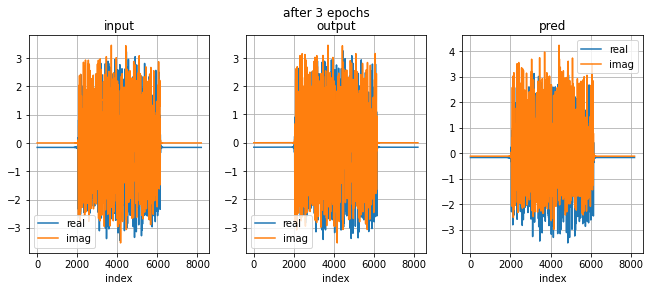

x power=1.0579084157943726
y power=1.128201961517334
pred power=1.10


In [6]:
trainer.test_single_item(0, verbose=True)

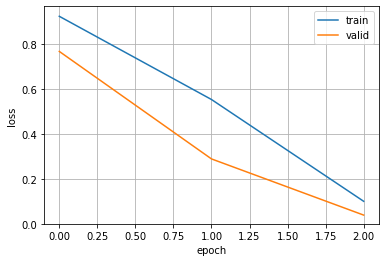

In [7]:
trainer.plot_loss_vec()

In [8]:
# calc original ber
trainer.compare_ber(tqdm=tqdm)

  0%|          | 0/30 [00:00<?, ?it/s]

the original avg ber is 0.006653645833333334


  0%|          | 0/30 [00:00<?, ?it/s]

the trained avg ber is 0.008033854166666667
